# The tf.data API

In [2]:
import tensorflow as tf

In [3]:
X=tf.constant([1,2,3,4,5,6,7,8,9])
dataset=tf.data.Dataset.from_tensor_slices(X)

In [4]:
dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [5]:
for item in dataset:
    print(item)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


2025-07-26 18:21:43.189312: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
X=tf.range(10)
dataset=tf.data.Dataset.from_tensor_slices(X)
dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [7]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


2025-07-26 18:21:43.200614: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [8]:
dataset=tf.data.Dataset.range(3)
dataset

<_RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

In [9]:
try:
    dataset[3]
except TypeError as ex:
    print(ex)


'_RangeDataset' object is not subscriptable


### tf.data Dataset with Structured Data

#### Tuple of Tensors

In [12]:
X = tf.constant([[1, 2], [3, 4], [5, 6]])
y = tf.constant([0, 1, 0])
dataset = tf.data.Dataset.from_tensor_slices((X, y))

In [13]:
for item in dataset:
    print(item)

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 4], dtype=int32)>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([5, 6], dtype=int32)>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)


#### Dictionary of Tensors

In [15]:
inputs = {
    "feature1": tf.constant([1.0, 2.0, 3.0]),
    "feature2": tf.constant([10.0, 20.0, 30.0])
}

dataset = tf.data.Dataset.from_tensor_slices(inputs)

In [16]:
for item in dataset:
    print(item)

{'feature1': <tf.Tensor: shape=(), dtype=float32, numpy=1.0>, 'feature2': <tf.Tensor: shape=(), dtype=float32, numpy=10.0>}
{'feature1': <tf.Tensor: shape=(), dtype=float32, numpy=2.0>, 'feature2': <tf.Tensor: shape=(), dtype=float32, numpy=20.0>}
{'feature1': <tf.Tensor: shape=(), dtype=float32, numpy=3.0>, 'feature2': <tf.Tensor: shape=(), dtype=float32, numpy=30.0>}


2025-07-26 18:21:43.251842: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


####  Nested Tuple + Dictionary

In [18]:
X = tf.constant([[1, 2], [3, 4], [5, 6]])
y = tf.constant([0, 1, 0])
meta = tf.constant([100, 200, 300])

dataset = tf.data.Dataset.from_tensor_slices(((X, meta), y))

In [19]:
for item in dataset:
    print(item,"\n")

((<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>, <tf.Tensor: shape=(), dtype=int32, numpy=100>), <tf.Tensor: shape=(), dtype=int32, numpy=0>) 

((<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 4], dtype=int32)>, <tf.Tensor: shape=(), dtype=int32, numpy=200>), <tf.Tensor: shape=(), dtype=int32, numpy=1>) 

((<tf.Tensor: shape=(2,), dtype=int32, numpy=array([5, 6], dtype=int32)>, <tf.Tensor: shape=(), dtype=int32, numpy=300>), <tf.Tensor: shape=(), dtype=int32, numpy=0>) 



## Chaining Transformations

In [21]:
dataset=tf.data.Dataset.from_tensor_slices(tf.range(10))
dataset=dataset.repeat(3).batch(7)

In [22]:
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


In [23]:
dataset=dataset.map(lambda x:x*2)   # x is a batch
for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int32)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)
tf.Tensor([16 18], shape=(2,), dtype=int32)


In [24]:
dataset=dataset.filter(lambda x:tf.reduce_sum(x)>50)  # x is a batch
for item in dataset:
    print(item)

tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)


2025-07-26 18:21:43.321837: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [25]:
for item in dataset.take(2):
    print(item)

tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)


In [26]:
import time

def slow_map_fn(x):
    tf.print("Processing", x)
    time.sleep(1)  # simulate slow processing
    return x * x

dataset=tf.data.Dataset.range(10)
dataset=dataset.map(lambda x: tf.py_function(slow_map_fn, [x], tf.int64)
                      ,num_parallel_calls=tf.data.AUTOTUNE)
for item in dataset:
    print(item.numpy())

Processing 0
Processing 6
Processing 2
Processing 3
Processing 4
Processing 7
Processing 1
Processing 5
0
Processing 8
Processing 9
1
4
9
16
25
36
49
64
81


## Shuffling the data

In [28]:
#This will shuffle batches
dataset=tf.data.Dataset.range(10).repeat(2).batch(7)
dataset=dataset.shuffle(buffer_size=4)
for item in dataset:
    print(item)

tf.Tensor([4 5 6 7 8 9], shape=(6,), dtype=int64)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int64)
tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)


In [29]:
#This Shuffles individual elements
dataset=tf.data.Dataset.range(20)
dataset=dataset.shuffle(buffer_size=10).batch(7)
for item in dataset:
    print(item)

tf.Tensor([ 7  3  4 12  6 13 14], shape=(7,), dtype=int64)
tf.Tensor([ 8 15 18 17  5 11  1], shape=(7,), dtype=int64)
tf.Tensor([10 16 19  2  9  0], shape=(6,), dtype=int64)


## Interleaving lines from multiple files

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing=fetch_california_housing()
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,
                                                         housing.target.reshape(-1,1),random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [32]:
from pathlib import Path
import numpy as np

def save_to_csv_files(data,name_prefix,header=None,n_parts=10):
    housing_dir=Path()/"datasets"/"housing"
    housing_dir.mkdir(parents=True,exist_ok=True)
    filename_format="my_{}_{:02d}.csv"

    filepaths=[]
    m=len(data)
    chunks=np.array_split(np.arange(m),n_parts)

    for file_idx,row_indices in enumerate(chunks):
        part_csv=housing_dir/filename_format.format(name_prefix,file_idx)
        filepaths.append(str(part_csv))
        with open(part_csv,"w") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([str(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

train_data=np.c_[X_train,y_train]
valid_data=np.c_[X_valid,y_valid]
test_data=np.c_[X_test,y_test]
header_cols=housing.feature_names+["MedianHouseValue"]
header=",".join(header_cols)


In [33]:
train_filepaths=save_to_csv_files(train_data,"train",header,n_parts=20)
valid_filepaths=save_to_csv_files(valid_data,"valid",header,n_parts=10)
test_filepaths=save_to_csv_files(test_data,"test",header,n_parts=10)

In [34]:
print("".join(open(train_filepaths[0]).readlines()[:4]))

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442
5.3275,5.0,6.490059642147117,0.9910536779324056,3464.0,3.4433399602385686,33.69,-117.39,1.687
3.1,29.0,7.5423728813559325,1.5915254237288134,1328.0,2.2508474576271187,38.44,-122.98,1.621



In [35]:
train_filepaths

['datasets/housing/my_train_00.csv',
 'datasets/housing/my_train_01.csv',
 'datasets/housing/my_train_02.csv',
 'datasets/housing/my_train_03.csv',
 'datasets/housing/my_train_04.csv',
 'datasets/housing/my_train_05.csv',
 'datasets/housing/my_train_06.csv',
 'datasets/housing/my_train_07.csv',
 'datasets/housing/my_train_08.csv',
 'datasets/housing/my_train_09.csv',
 'datasets/housing/my_train_10.csv',
 'datasets/housing/my_train_11.csv',
 'datasets/housing/my_train_12.csv',
 'datasets/housing/my_train_13.csv',
 'datasets/housing/my_train_14.csv',
 'datasets/housing/my_train_15.csv',
 'datasets/housing/my_train_16.csv',
 'datasets/housing/my_train_17.csv',
 'datasets/housing/my_train_18.csv',
 'datasets/housing/my_train_19.csv']

In [36]:
test_filepaths

['datasets/housing/my_test_00.csv',
 'datasets/housing/my_test_01.csv',
 'datasets/housing/my_test_02.csv',
 'datasets/housing/my_test_03.csv',
 'datasets/housing/my_test_04.csv',
 'datasets/housing/my_test_05.csv',
 'datasets/housing/my_test_06.csv',
 'datasets/housing/my_test_07.csv',
 'datasets/housing/my_test_08.csv',
 'datasets/housing/my_test_09.csv']

#### Building an Input Pipeline

In [38]:
filepath_dataset=tf.data.Dataset.list_files(train_filepaths,seed=42)

In [39]:
for filepath in filepath_dataset:
    print(filepath)

tf.Tensor(b'datasets/housing/my_train_05.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_16.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_01.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_17.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_00.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_14.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_10.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_02.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_12.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_19.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_07.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_09.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_13.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_15.csv', shape=(), dtype=string)
tf.Ten

In [40]:
n_readers=5
dataset=filepath_dataset.interleave(
    lambda filepath:tf.data.TextLineDataset(filepath).skip(1),
    cycle_length=n_readers
)

In [41]:
for line in dataset.take(4):
    print(line)

tf.Tensor(b'4.5909,16.0,5.475877192982456,1.0964912280701755,1357.0,2.9758771929824563,33.63,-117.71,2.418', shape=(), dtype=string)
tf.Tensor(b'2.4792,24.0,3.4547038327526134,1.1341463414634145,2251.0,3.921602787456446,34.18,-118.38,2.0', shape=(), dtype=string)
tf.Tensor(b'4.2708,45.0,5.121387283236994,0.953757225433526,492.0,2.8439306358381504,37.48,-122.19,2.67', shape=(), dtype=string)
tf.Tensor(b'2.1856,41.0,3.7189873417721517,1.0658227848101265,803.0,2.0329113924050635,32.76,-117.12,1.205', shape=(), dtype=string)


## Preprocessing the Data

In [43]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [44]:
X_mean,X_std=scaler.mean_,scaler.scale_
n_inputs=8

def parse_csv_line(line):
    defs=[0.]*n_inputs+[tf.constant([],dtype=tf.float32)]
    fields=tf.io.decode_csv(line,record_defaults=defs)
    return tf.stack(fields[:-1]),tf.stack(fields[-1:])

def preprocess(line):
    x,y=parse_csv_line(line)
    return (x-X_mean)/X_std,y

In [45]:
preprocess(b'3.5214,15.0,3.0499445061043287,1.106548279689234,,1.6059933407325193,37.63,-122.43,0')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([-0.19397889, -1.0778131 , -0.9433854 ,  0.01485314, -1.2998114 ,
        -0.5729162 ,  0.9292612 , -1.4221538 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>)

## Putting Everything Together + Prefetching

In [47]:
def csv_reader_dataset(filepath,n_readers=5,n_read_threads=None,n_parse_threads=4,
                      shuffle_buffer_size=10000,seed=42,batch_size=32,repeat=False):
    dataset=tf.data.Dataset.list_files(filepath,seed=seed)
    dataset=dataset.interleave(
        lambda filepath:tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers,num_parallel_calls=n_read_threads  )
    dataset=dataset.map(preprocess,num_parallel_calls=n_parse_threads)
    dataset=dataset.shuffle(buffer_size=shuffle_buffer_size,seed=seed)
    if repeat:
        dataset=dataset.repeat()
    
    return dataset.batch(batch_size).prefetch(1)

In [48]:
example_set=csv_reader_dataset(train_filepaths,batch_size=4)
for X_batch,y_batch in example_set.take(2):
    print("X =",X_batch)
    print("y =",y_batch)
    print()

X = tf.Tensor(
[[-1.3957452  -0.04940685 -0.22830808  0.22648273  2.2593622   0.35200632
   0.9667386  -1.4121602 ]
 [ 2.7112627  -1.0778131   0.69413143 -0.14870553  0.51810503  0.3507294
  -0.82285154  0.80680597]
 [-0.13484643 -1.868895    0.01032507 -0.13787179 -0.12893449  0.03143518
   0.2687057   0.13212144]
 [ 0.09031774  0.9789995   0.1327582  -0.13753782 -0.23388447  0.10211545
   0.97610843 -1.4121602 ]], shape=(4, 8), dtype=float32)
y = tf.Tensor(
[[1.819]
 [3.674]
 [0.954]
 [2.725]], shape=(4, 1), dtype=float32)

X = tf.Tensor(
[[ 0.05218809 -2.0271113   0.2940109  -0.02403445  0.16218767 -0.02844518
   1.4117942  -0.93737936]
 [-0.672276    0.02970133 -0.76922584 -0.15086786  0.4962024  -0.02741998
  -0.7853724   0.77182245]
 [-0.8111771   0.34613404 -0.21826383 -0.0801027   0.06636376  0.26724264
   0.1937491   0.30204034]
 [-0.689403    1.8491895  -0.80511904 -0.08778115  1.0903106  -0.36003128
   0.994848   -1.4171551 ]], shape=(4, 8), dtype=float32)
y = tf.Tensor(
[[1

## Using Dataset with Keras

In [50]:
train_set=csv_reader_dataset(train_filepaths,repeat=True)
valid_set=csv_reader_dataset(valid_filepaths)
test_set=csv_reader_dataset(test_filepaths,repeat=True)

In [51]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(42)

In [52]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(20,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1)
])

In [53]:
model.compile(loss="mse",optimizer="nadam")

step_per_epoch=len(X_train)//32
validation_steps=len(X_valid)//32
model.fit(train_set,
         epochs=3,
         steps_per_epoch=step_per_epoch,
         validation_data=valid_set,
         validation_steps=validation_steps)

Epoch 1/3
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - loss: 3.8101 - val_loss: 3.9114
Epoch 2/3
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 0.9672 - val_loss: 0.8660
Epoch 3/3
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 0.6777 - val_loss: 0.6843


In [54]:
model.evaluate(test_set,steps=len(X_test)//32)

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 0.5918 


0.5716007947921753

In [55]:
new_set=test_set.take(2)
y_pred=model.predict(new_set)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [56]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
loss_fn=tf.keras.losses.MeanSquaredError()
steps_per_epoch = len(X_train) // 32
n_epochs=5

for epoch in range(1,n_epochs+1):
    print("\rEpoch: {}/{}".format(epoch,n_epochs),end="")
    for X_batch,y_batch in train_set.take(steps_per_epoch):
        with tf.GradientTape() as tape:
            y_pred=model(X_batch)
            main_loss=tf.reduce_mean(loss_fn(y_batch,y_pred))
            loss=tf.add_n([main_loss]+model.losses)

        gradient=tape.gradient(loss,model.trainable_variables)
        optimizer.apply_gradients(zip(gradient,model.trainable_variables))
print("\nTraining Completed!")

Epoch: 1/5

2025-07-26 18:21:50.196494: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 5/5
Training Completed!


In [57]:
@tf.function
def train_step(model,X_batch,y_batch,optimizer,loss_fn):
    with tf.GradientTape() as tape:
        
        y_pred=model(X_batch)
        main_loss=tf.reduce_mean(loss_fn(y_batch,y_pred))
        loss=tf.add_n([main_loss]+model.losses)
    gradient=tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradient,model.trainable_variables))
    
        


steps_per_epoch=len(X_train)//32
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
loss_fn=tf.keras.losses.MeanSquaredError()
n_epochs=5

for epoch in range(1,n_epochs+1):
    print("\rEpoch: {}/{}".format(epoch,n_epochs),end="")
    for X_batch,y_batch in train_set.take(steps_per_epoch):       
        train_step(model,X_batch,y_batch,optimizer,loss_fn)
print("\nTraining Completed!")

Epoch: 5/5
Training Completed!


# The TFRecord Format

In [59]:
with tf.io.TFRecordWriter("my_data.tfrecord") as f:
    f.write(b"This is the first record.")
    f.write(b"This is just after first record")

In [60]:
filepaths=["my_data.tfrecord"]

dataset=tf.data.TFRecordDataset(filepaths)
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record.', shape=(), dtype=string)
tf.Tensor(b'This is just after first record', shape=(), dtype=string)


2025-07-26 18:22:02.030163: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:381] TFRecordDataset `buffer_size` is unspecified, default to 262144


In [61]:

filepaths=["my_test_{}".format(i) for i in range(5)]
for i ,filepath in enumerate(filepaths):
   with tf.io.TFRecordWriter(filepath) as f:
       for j in range(3):
           f.write("File: {} Record: {}".format(i,j))

dataset=tf.data.TFRecordDataset(filepaths,num_parallel_reads=3)
for item in dataset:
    print(item)
       
    


tf.Tensor(b'File: 0 Record: 0', shape=(), dtype=string)
tf.Tensor(b'File: 1 Record: 0', shape=(), dtype=string)
tf.Tensor(b'File: 2 Record: 0', shape=(), dtype=string)
tf.Tensor(b'File: 0 Record: 1', shape=(), dtype=string)
tf.Tensor(b'File: 1 Record: 1', shape=(), dtype=string)
tf.Tensor(b'File: 2 Record: 1', shape=(), dtype=string)
tf.Tensor(b'File: 0 Record: 2', shape=(), dtype=string)
tf.Tensor(b'File: 1 Record: 2', shape=(), dtype=string)
tf.Tensor(b'File: 2 Record: 2', shape=(), dtype=string)
tf.Tensor(b'File: 3 Record: 0', shape=(), dtype=string)
tf.Tensor(b'File: 4 Record: 0', shape=(), dtype=string)
tf.Tensor(b'File: 3 Record: 1', shape=(), dtype=string)
tf.Tensor(b'File: 4 Record: 1', shape=(), dtype=string)
tf.Tensor(b'File: 3 Record: 2', shape=(), dtype=string)
tf.Tensor(b'File: 4 Record: 2', shape=(), dtype=string)


## Compressed TFRecord Files

In [63]:
options=tf.io.TFRecordOptions(compression_type="GZIP")
with tf.io.TFRecordWriter("my_compressed.tfrecord",options) as f:
    f.write(b"Compress, compress, compress!")
dataset=tf.data.TFRecordDataset(["my_compressed.tfrecord"],compression_type="GZIP")

for item in dataset:
    print(item)

tf.Tensor(b'Compress, compress, compress!', shape=(), dtype=string)


## Protocol Buffers

In [65]:
%%writefile person.proto
syntax="proto3";
message Person{
    string name=1;
    int32 id=2;
    repeated string email=3;
}

Overwriting person.proto


In [66]:
!protoc person.proto --python_out=. --descriptor_set_out=person.desc --include_imports

In [67]:
from person_pb2 import Person

person=Person(name="AGI",id=222,email=["abc@d.com"])

In [68]:
person

name: "AGI"
id: 222
email: "abc@d.com"

In [69]:
person.name

'AGI'

In [70]:
person.name="ASI"

In [71]:
person

name: "ASI"
id: 222
email: "abc@d.com"

In [72]:
person.email.append("dd@g.com")

In [73]:
person

name: "ASI"
id: 222
email: "abc@d.com"
email: "dd@g.com"

In [74]:
serialized = person.SerializeToString()
serialized

b'\n\x03ASI\x10\xde\x01\x1a\tabc@d.com\x1a\x08dd@g.com'

In [75]:
person2=Person()
person2.ParseFromString(serialized)

29

In [76]:
person2==person

True

#### Custom Protobuf

In [78]:
person_tf=tf.io.decode_proto(
    bytes=serialized,
    message_type="Person",
    field_names=["name","id","email"],
    output_types=[tf.string,tf.int32,tf.string],
    descriptor_source="person.desc"
)

In [79]:
person_tf.values

[<tf.Tensor: shape=(1,), dtype=string, numpy=array([b'ASI'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([222], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'abc@d.com', b'dd@g.com'], dtype=object)>]

### TensorFlow Protobufs

In [81]:
from tensorflow.train import BytesList,FloatList,Int64List
from tensorflow.train import Feature,Example,Features

person_example=Example(
    features=Features(
        feature={
            "name":Feature(bytes_list=BytesList(value=[b"AGI"])),
            "id":Feature(int64_list=Int64List(value=[123])),
            "email":Feature(bytes_list=BytesList(value=[b"a@b.com",
                                                        b"c@d.com"]))
        }
    )
)

In [82]:
with tf.io.TFRecordWriter("my_contacts.tfrecord") as f:
    for _ in range(5):
        f.write(person_example.SerializeToString())

### Loading and Parsing

In [84]:
feature_description={
    "name": tf.io.FixedLenFeature([],tf.string,default_value=""),
    "id": tf.io.FixedLenFeature([],tf.int64,default_value=0),
    "email": tf.io.VarLenFeature(tf.string)
}

def parse(serialized_example):
    return tf.io.parse_single_example(serialized_example,feature_description)

dataset=tf.data.TFRecordDataset(["my_contacts.tfrecord"]).map(parse)

for record in dataset:
    print(record)

{'email': SparseTensor(indices=tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)), 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'AGI'>}
{'email': SparseTensor(indices=tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)), 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'AGI'>}
{'email': SparseTensor(indices=tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)), 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'AGI'>}
{'email': SparseTensor(indices=tf.Tensor(
[[0]
 [

In [85]:
tf.sparse.to_dense(record["email"])

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [86]:
record["email"].values

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [87]:
def parse(serialized_example):
    return tf.io.parse_example(serialized_example,feature_description)

dataset=tf.data.TFRecordDataset(["my_contacts.tfrecord"]).batch(2).map(parse)

In [88]:
for record in dataset:
    print(record)

{'email': SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]
 [1 0]
 [1 1]], shape=(4, 2), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com' b'a@b.com' b'c@d.com'], shape=(4,), dtype=string), dense_shape=tf.Tensor([2 2], shape=(2,), dtype=int64)), 'id': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([123, 123])>, 'name': <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'AGI', b'AGI'], dtype=object)>}
{'email': SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]
 [1 0]
 [1 1]], shape=(4, 2), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com' b'a@b.com' b'c@d.com'], shape=(4,), dtype=string), dense_shape=tf.Tensor([2 2], shape=(2,), dtype=int64)), 'id': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([123, 123])>, 'name': <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'AGI', b'AGI'], dtype=object)>}
{'email': SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([1 2], 

In [89]:
record

{'email': SparseTensor(indices=tf.Tensor(
 [[0 0]
  [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([1 2], shape=(2,), dtype=int64)),
 'id': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([123])>,
 'name': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'AGI'], dtype=object)>}

###  Convert CSV → TFRecord → Load TFRecord and Parse

In [91]:
# Prepare sample csv
import csv 
rows = [
    ["name", "age", "weight"],
    ["Alice", 25, 55.5],
    ["Bob", 30, 72.3],
    ["Charlie", 22, 60.0]
]

with open("people.csv","w",newline="") as f:
    writer=csv.writer(f)
    writer.writerows(rows)

In [92]:
#Convert CSV to TFRecord
def new_person_example(name,age,weight):
    return Example(
    features=Features(
        feature={
            "name":Feature(bytes_list=BytesList(value=[name.encode()])),
            "age":Feature(int64_list=Int64List(value=[age])),
            "weight":Feature(float_list=FloatList(value=[weight]))
            
        }
    )
)

with open("people.csv") as f,tf.io.TFRecordWriter("people.tfrecord") as writer:
    next(f) #skip header
    for line in f:
        name,age,weight=line.strip().split(",")
        example=new_person_example(name,int(age),float(weight))
        writer.write(example.SerializeToString())

In [93]:
#Load and Parse TFRecord
feature_description={
    "name":tf.io.FixedLenFeature([],tf.string),
    "age":tf.io.FixedLenFeature([],tf.int64),
    "weight":tf.io.FixedLenFeature([],tf.float32)
}

def parse(serialized_example):
    return tf.io.parse_single_example(serialized_example,feature_description)

dataset=tf.data.TFRecordDataset(["people.tfrecord"])
dataset=dataset.map(parse)

for record in dataset:
    print("Name:",record["name"].numpy().decode())
    print("Age:",record["age"].numpy())
    print("Weight:",record["weight"].numpy())
    print("----------")


Name: Alice
Age: 25
Weight: 55.5
----------
Name: Bob
Age: 30
Weight: 72.3
----------
Name: Charlie
Age: 22
Weight: 60.0
----------


## Storing Images and Tensors in TFRecords

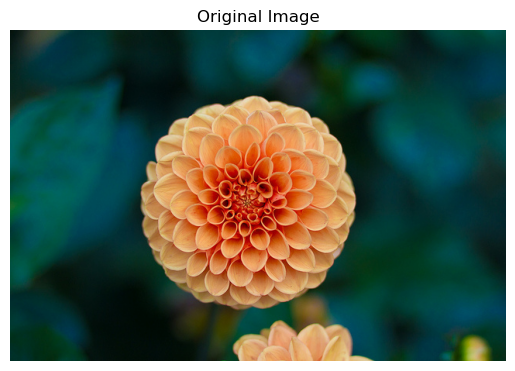

In [95]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_images

image=load_sample_images()["images"][1]
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.show()

In [96]:
image.shape

(427, 640, 3)

In [97]:
data=tf.io.encode_jpeg(image).numpy()

example_with_image=Example(
    features=Features(
        feature={
            "image":Feature(bytes_list=BytesList(value=[data]))
        }
    )
)

serialized_example=example_with_image.SerializeToString()
with tf.io.TFRecordWriter("my_image.tfrecord") as f:
    f.write(serialized_example)

2025-07-26 18:22:02.831746: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


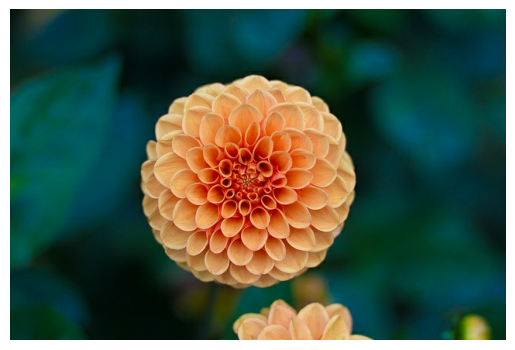

In [98]:
feature_description={
    "image":tf.io.VarLenFeature(tf.string)
}

def parse(serialized_example):
    example_with_image=tf.io.parse_single_example(serialized_example,feature_description)
    return tf.io.decode_jpeg(example_with_image["image"].values[0])


dataset=tf.data.TFRecordDataset("my_image.tfrecord").map(parse)

for image in dataset:  
    plt.imshow(image)
    plt.axis("off")
    

In [99]:
import os 

def _bytes_feature(value):
    return Feature(bytes_list=BytesList(value=[value]))

def _int64_feature(value):
    return Feature(int64_list=Int64List(value=[value]))

def image_example(image_string,label):
    feature={
        "image":_bytes_feature(image_string),
        "label":_int64_feature(label)
    }
    return Example(features=Features(feature=feature))

In [100]:
image_dir="images"
tfrecord_file="images.tfrecord"

with tf.io.TFRecordWriter(tfrecord_file)as writer:
    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg"):
            path=os.path.join(image_dir,filename)
            label= 0 if "cat" in filename else 1


            img_raw=tf.io.read_file(path).numpy()
            example=image_example(img_raw,label)
            writer.write(example.SerializeToString())
    

In [101]:
feature_description={
    "image":tf.io.FixedLenFeature([],tf.string),
    "label":tf.io.FixedLenFeature([],tf.int64)
}

def parse(serialized_example):
    parsed=tf.io.parse_single_example(serialized_example,feature_description)
    img=tf.io.decode_image(parsed["image"],channels=3)
    label=parsed["label"]
    return img,label
    

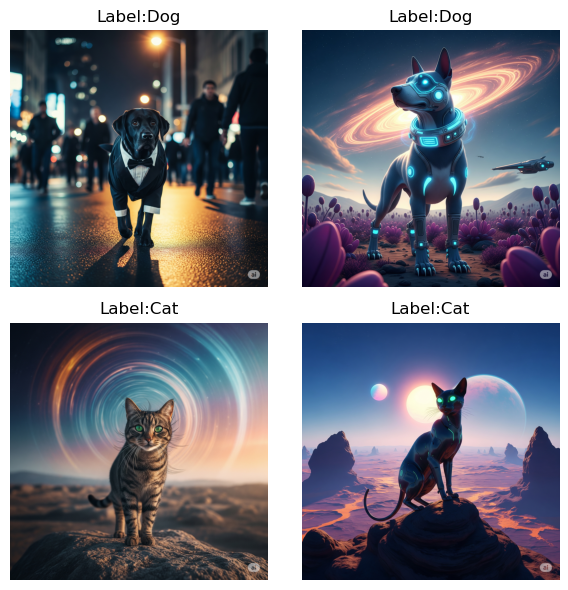

In [102]:
dataset=tf.data.TFRecordDataset(["images.tfrecord"]).map(parse)

plt.figure(figsize=(6,6))
for idx,(img,label) in enumerate(dataset):
    plt.subplot(2,2,idx+1)
    plt.imshow(img.numpy())
    plt.title(f"Label:{"Cat"if label==0 else "Dog"}")
    plt.axis("off")
plt.tight_layout()


In [103]:
tensor=tf.constant([[0., 1.], [2., 3.], [4., 5.]])
serialized=tf.io.serialize_tensor(tensor)
serialized

<tf.Tensor: shape=(), dtype=string, numpy=b'\x08\x01\x12\x08\x12\x02\x08\x03\x12\x02\x08\x02"\x18\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00@\x00\x00@@\x00\x00\x80@\x00\x00\xa0@'>

In [104]:
tf.io.parse_tensor(serialized,out_type=tf.float32)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 1.],
       [2., 3.],
       [4., 5.]], dtype=float32)>

## Handling List of List Using the SequenceExample

In [106]:
from tensorflow.train import FeatureList,FeatureLists,SequenceExample

context=Features(feature={
    "author_id":Feature(int64_list=Int64List(value=[123])),
    "title":Feature(bytes_list=BytesList(value=[b"A",b"desert",b"place",b"."])),
    "pub_date":Feature(int64_list=Int64List(value=[1623,12,25]))
})

content=[["When", "shall", "we", "three", "meet", "again", "?"],
           ["In", "thunder", ",", "lightning", ",", "or", "in", "rain", "?"]]
comments = [["When", "the", "hurlyburly", "'s", "done", "."],
            ["When", "the", "battle", "'s", "lost", "and", "won", "."]]

def words_to_features(words):
    return Feature(bytes_list=BytesList(value=[word.encode("utf-8") for word in words]))

content_features=[words_to_features(sentence) for sentence in content]
comments_features=[words_to_features(sentence) for sentence in comments]

sequence_example=SequenceExample(
    context=context,
    feature_lists=FeatureLists(feature_list={
        "content":FeatureList(feature=content_features),
        "comments":FeatureList(feature=comments_features)
    })
)

In [107]:
sequence_example

context {
  feature {
    key: "author_id"
    value {
      int64_list {
        value: 123
      }
    }
  }
  feature {
    key: "pub_date"
    value {
      int64_list {
        value: 1623
        value: 12
        value: 25
      }
    }
  }
  feature {
    key: "title"
    value {
      bytes_list {
        value: "A"
        value: "desert"
        value: "place"
        value: "."
      }
    }
  }
}
feature_lists {
  feature_list {
    key: "comments"
    value {
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "hurlyburly"
          value: "\'s"
          value: "done"
          value: "."
        }
      }
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "battle"
          value: "\'s"
          value: "lost"
          value: "and"
          value: "won"
          value: "."
        }
      }
    }
  }
  feature_list {
    key: "content"
    value {
      feature {
      

In [108]:
with tf.io.TFRecordWriter("sequence_example.tfrecord") as f:
    f.write(sequence_example.SerializeToString())

In [109]:
context_feature_description={
    "author_id":tf.io.FixedLenFeature([],tf.int64),
    "title":tf.io.VarLenFeature(tf.string),
    "pub_date":tf.io.FixedLenFeature([3],tf.int64)
}

sequence_feature_description={
    "content":tf.io.VarLenFeature(tf.string),
    "comments":tf.io.VarLenFeature(tf.string)
}

def parse(serialized_feature_example):
    return tf.io.parse_single_sequence_example(serialized_feature_example,
                        context_feature_description,sequence_feature_description)

dataset=tf.data.TFRecordDataset("sequence_example.tfrecord").map(parse)
for context,sequence in dataset:
    print("Author ID:",context["author_id"].numpy())
    print("Title:",tf.sparse.to_dense(context["title"]).numpy())
    print("Pub Date:",context["pub_date"].numpy())
    print("")
    print("Content:",tf.sparse.to_dense(sequence["content"]).numpy())
    print("Comments:",tf.sparse.to_dense(sequence["comments"]).numpy())

Author ID: 123
Title: [b'A' b'desert' b'place' b'.']
Pub Date: [1623   12   25]

Content: [[b'When' b'shall' b'we' b'three' b'meet' b'again' b'?' b'' b'']
 [b'In' b'thunder' b',' b'lightning' b',' b'or' b'in' b'rain' b'?']]
Comments: [[b'When' b'the' b'hurlyburly' b"'s" b'done' b'.' b'' b'']
 [b'When' b'the' b'battle' b"'s" b'lost' b'and' b'won' b'.']]


# Keras Preprocessing Layers

## The Normalizing layer

In [112]:
tf.random.set_seed(42)

norm_layer=tf.keras.layers.Normalization()
model=tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(1)]
)

model.compile(loss="mse",optimizer="nadam")
norm_layer.adapt(X_train)
model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 5.6528 - val_loss: 19.9754
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 4.0160 - val_loss: 16.8706
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 2.9307 - val_loss: 14.2146
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 2.1443 - val_loss: 11.9279
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 1.5859 - val_loss: 9.9626


In [113]:
norm_layer=tf.keras.layers.Normalization()
norm_layer.adapt(X_train)
X_train_scaled=norm_layer(X_train)
X_valid_scaled=norm_layer(X_valid)

In [114]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(loss="mse",optimizer="nadam")
model.fit(X_train_scaled,y_train,
         epochs=5,
         validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 5.4137 - val_loss: 5.7148
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 3.7657 - val_loss: 3.7198
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 2.6969 - val_loss: 2.3851
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 1.9572 - val_loss: 1.5299
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 1.4436 - val_loss: 1.0497


In [115]:
final_model=tf.keras.Sequential([norm_layer,model])
X_new=X_test[:3]
y_pred=final_model(X_new)

In [116]:
y_pred

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.44607776],
       [0.84182155],
       [1.7335382 ]], dtype=float32)>

In [117]:
dataset=tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(5)


In [118]:
list(dataset.take(1))

[(<tf.Tensor: shape=(5, 8), dtype=float64, numpy=
  array([[ 3.52140000e+00,  1.50000000e+01,  3.04994451e+00,
           1.10654828e+00,  1.44700000e+03,  1.60599334e+00,
           3.76300000e+01, -1.22430000e+02],
         [ 5.32750000e+00,  5.00000000e+00,  6.49005964e+00,
           9.91053678e-01,  3.46400000e+03,  3.44333996e+00,
           3.36900000e+01, -1.17390000e+02],
         [ 3.10000000e+00,  2.90000000e+01,  7.54237288e+00,
           1.59152542e+00,  1.32800000e+03,  2.25084746e+00,
           3.84400000e+01, -1.22980000e+02],
         [ 7.17360000e+00,  1.20000000e+01,  6.28900256e+00,
           9.97442455e-01,  1.05400000e+03,  2.69565217e+00,
           3.35500000e+01, -1.17700000e+02],
         [ 2.05490000e+00,  1.30000000e+01,  5.31245745e+00,
           1.08509190e+00,  3.29700000e+03,  2.24438393e+00,
           3.39300000e+01, -1.16930000e+02]])>,
  <tf.Tensor: shape=(5, 1), dtype=float64, numpy=
  array([[1.442],
         [1.687],
         [1.621],
        

In [119]:
dataset=dataset.map(lambda x,y:(norm_layer(x),y))

In [120]:
list(dataset.take(1))

[(<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
  array([[-0.19397889, -1.0778131 , -0.9433854 ,  0.01485314,  0.02073333,
          -0.57291627,  0.9292612 , -1.4221537 ],
         [ 0.7519831 , -1.868895  ,  0.40547806, -0.23327684,  1.8614649 ,
           0.20516537, -0.9165477 ,  1.0966716 ],
         [-0.41469118,  0.02970133,  0.8180882 ,  1.0567837 , -0.0878671 ,
          -0.2998328 ,  1.3087282 , -1.697027  ],
         [ 1.7188957 , -1.3151377 ,  0.32664376, -0.2195511 , -0.33792186,
          -0.11146631, -0.9821345 ,  0.94174504],
         [-0.9620722 , -1.2360295 , -0.05625783, -0.03124396,  1.7090592 ,
          -0.30256987, -0.80411196,  1.3265638 ]], dtype=float32)>,
  <tf.Tensor: shape=(5, 1), dtype=float64, numpy=
  array([[1.442],
         [1.687],
         [1.621],
         [2.621],
         [0.956]])>)]

In [121]:
class MyNormalizationLayer(tf.keras.layers.Layer):
    def adapt(self,X):
        X=tf.convert_to_tensor(X,dtype=tf.float32)
        self.mean_=tf.reduce_mean(X,axis=0,keepdims=True)
        self.std_=tf.math.reduce_std(X,axis=0,keepdims=True)
    def call(self,inputs):
        eps=tf.keras.backend.epsilon()
        return (inputs-self.mean_)/(self.std_+eps)

In [122]:
my_norm_layer=MyNormalizationLayer()
my_norm_layer.adapt(X_train)

In [123]:
dataset=tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(5)
dataset=dataset.map(lambda x,y:(my_norm_layer(x),y))

In [124]:
list(dataset.take(1))

[(<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
  array([[-0.19397822, -1.0778134 , -0.9433856 ,  0.01485211,  0.02073333,
          -0.57291615,  0.92926455, -1.4221537 ],
         [ 0.7519836 , -1.8688953 ,  0.4054784 , -0.23327777,  1.8614651 ,
           0.20516533, -0.91654396,  1.0966716 ],
         [-0.41469046,  0.02970133,  0.81808865,  1.0567822 , -0.0878671 ,
          -0.29983273,  1.3087314 , -1.697027  ],
         [ 1.7188959 , -1.315138  ,  0.3266441 , -0.21955204, -0.3379219 ,
          -0.11146629, -0.9821307 ,  0.94174504],
         [-0.9620714 , -1.2360297 , -0.05625766, -0.03124497,  1.7090594 ,
          -0.3025698 , -0.8041082 ,  1.3265638 ]], dtype=float32)>,
  <tf.Tensor: shape=(5, 1), dtype=float64, numpy=
  array([[1.442],
         [1.687],
         [1.621],
         [2.621],
         [0.956]])>)]

## The Discretization Layer

In [126]:
age=tf.constant([[5.0], [17.0], [18.0], [25.0], [50.0], [70.0]])
discretization_layer=tf.keras.layers.Discretization(bin_boundaries=[18.,50])
age_categories=discretization_layer(age)
age_categories

<tf.Tensor: shape=(6, 1), dtype=int64, numpy=
array([[0],
       [0],
       [1],
       [1],
       [2],
       [2]])>

In [127]:
discretization_layer=tf.keras.layers.Discretization(num_bins=3)
discretization_layer.adapt(age)
age_categories=discretization_layer(age)
age_categories

<tf.Tensor: shape=(6, 1), dtype=int64, numpy=
array([[0],
       [1],
       [1],
       [2],
       [2],
       [2]])>

## The Category Encoding

In [129]:
onehot_layers=tf.keras.layers.CategoryEncoding(num_tokens=3)
onehot_layers(age_categories)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)>

In [130]:
two_age_categories=tf.constant([[1,2],[2,2],[1,0],[0,1]])
onehot_layers(two_age_categories)

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[0., 1., 1.],
       [0., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.]], dtype=float32)>

In [131]:
onehot_layers=tf.keras.layers.CategoryEncoding(num_tokens=3,output_mode="count")
onehot_layers(two_age_categories)

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[0., 1., 1.],
       [0., 0., 2.],
       [1., 1., 0.],
       [1., 1., 0.]], dtype=float32)>

In [132]:
onehot_layers=tf.keras.layers.CategoryEncoding(num_tokens=3+3)
onehot_layers(two_age_categories+[0,3])

<tf.Tensor: shape=(4, 6), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0.]], dtype=float32)>

In [133]:
onehot_layers=tf.keras.layers.CategoryEncoding(num_tokens=3,output_mode="one_hot")
tf.keras.layers.concatenate([onehot_layers(cat) for cat in tf.transpose(two_age_categories)])

<tf.Tensor: shape=(4, 6), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0.]], dtype=float32)>

In [134]:
tf.one_hot(two_age_categories,depth=3)

<tf.Tensor: shape=(4, 2, 3), dtype=float32, numpy=
array([[[0., 1., 0.],
        [0., 0., 1.]],

       [[0., 0., 1.],
        [0., 0., 1.]],

       [[0., 1., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [0., 1., 0.]]], dtype=float32)>

In [135]:
tf.keras.layers.Flatten()(tf.one_hot(two_age_categories,depth=3))

<tf.Tensor: shape=(4, 6), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0.]], dtype=float32)>

## StringLookup Layer

In [137]:
cities=[ "Paris", "Berlin", "Berlin", "Rome"]
string_lookup_layer=tf.keras.layers.StringLookup()
string_lookup_layer.adapt(cities)
string_lookup_layer([[ "Berlin"],["Paris"],["Paris"],["Madrid"],["Rome"]])


<tf.Tensor: shape=(5, 1), dtype=int64, numpy=
array([[1],
       [3],
       [3],
       [0],
       [2]])>

In [138]:
string_lookup_layer=tf.keras.layers.StringLookup(output_mode="one_hot")
string_lookup_layer.adapt(cities)
string_lookup_layer([[ "Berlin"],["Paris"],["Paris"],["Madrid"],["Rome"]])

<tf.Tensor: shape=(5, 4), dtype=int64, numpy=
array([[0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0]])>

In [139]:
ids=[133,432,876]
int_lookup_layer=tf.keras.layers.IntegerLookup()
int_lookup_layer.adapt(ids)
int_lookup_layer([[133],[432],[564],[876]])

<tf.Tensor: shape=(4, 1), dtype=int64, numpy=
array([[3],
       [2],
       [0],
       [1]])>

In [140]:
string_lookup_layer=tf.keras.layers.StringLookup(num_oov_indices=5)
string_lookup_layer.adapt(cities)
string_lookup_layer([[ "Berlin"],["Paris"],["Foo"],["Bar"],["Buz"]])

<tf.Tensor: shape=(5, 1), dtype=int64, numpy=
array([[5],
       [7],
       [4],
       [3],
       [3]])>

## Hashing Layer

In [142]:
hashing_layer=tf.keras.layers.Hashing(num_bins=10)
hashing_layer([[ "Berlin"],["Paris"],["Paris"],["Madrid"],["Rome"]])

<tf.Tensor: shape=(5, 1), dtype=int64, numpy=
array([[1],
       [0],
       [0],
       [9],
       [9]])>

## Encoding Categorical Features using Embeddings

In [144]:
tf.random.set_seed(42)
embedding_layer=tf.keras.layers.Embedding(input_dim=5,output_dim=2)
embedding_layer(np.array([2,4,2]))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.01916926, -0.04307963],
       [ 0.03028948, -0.04409377],
       [ 0.01916926, -0.04307963]], dtype=float32)>

In [145]:
ocean_prox=["<1H OCEAN", "INLAND", "NEAR OCEAN", "NEAR BAY", "ISLAND"]
string_lookup_layer=tf.keras.layers.StringLookup()
string_lookup_layer.adapt(ocean_prox)
string_lookup_layer([["<1H OCEAN"], ["INLAND"], ["NEAR OCEAN"], ["NEAR BAY"], ["ISLAND"]])

<tf.Tensor: shape=(5, 1), dtype=int64, numpy=
array([[5],
       [4],
       [1],
       [2],
       [3]])>

In [146]:
lookup_amd_embed=tf.keras.Sequential([
    
    string_lookup_layer,
    tf.keras.layers.Embedding(input_dim=string_lookup_layer.vocabulary_size(),output_dim=2)
    
])
lookup_amd_embed(np.array(["<1H OCEAN", "INLAND", "NEAR OCEAN", "NEAR BAY", "ISLAND"]))

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[-0.00662841,  0.04407636],
       [-0.00373864,  0.02676559],
       [-0.00742848,  0.01011195],
       [ 0.04641331, -0.01566237],
       [ 0.04796327,  0.04586783]], dtype=float32)>

In [147]:
tf.keras.utils.set_random_seed(42)

X_train_num=np.random.rand(10000,8)
X_train_cat=np.random.choice(ocean_prox,size=10000).astype(object)
y_train=np.random.rand(10000,1)

X_valid_num=np.random.rand(2000,8)
X_valid_cat=np.random.choice(ocean_prox,size=2000).astype(object)
y_valid=np.random.rand(2000,1)

num_input=tf.keras.layers.Input(shape=[8])
cat_input=tf.keras.layers.Input(shape=[],dtype=tf.string)

cat_embeddings=lookup_amd_embed(cat_input)
encoded_inputs=tf.keras.layers.concatenate([num_input,cat_embeddings])
outputs=tf.keras.layers.Dense(1)(encoded_inputs)

model=tf.keras.models.Model(inputs=[num_input,cat_input],outputs=[outputs])
model.compile(loss="mse",optimizer="nadam")

history=model.fit((X_train_num,X_train_cat),y_train,
                 epochs=5,
                 validation_data=((X_valid_num,X_valid_cat),y_valid))

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.2245 - val_loss: 0.1602
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.1480 - val_loss: 0.1171
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.1104 - val_loss: 0.0973
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.0937 - val_loss: 0.0890
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 0.0868 - val_loss: 0.0857


In [148]:
train_set=tf.data.Dataset.from_tensor_slices(((X_train_num,X_train_cat),y_train)).batch(32)

valid_set=tf.data.Dataset.from_tensor_slices(((X_valid_num,X_valid_cat),y_valid)).batch(32)

history=model.fit(train_set,epochs=4,validation_data=(valid_set))

Epoch 1/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 0.0847 - val_loss: 0.0843
Epoch 2/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.0837 - val_loss: 0.0837
Epoch 3/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.0832 - val_loss: 0.0834
Epoch 4/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.0830 - val_loss: 0.0832


## Text Preprocessing

In [150]:
train_data=["To be", "!(to be)", "That's the question", "Be, be, be."]
text_vector_layer=tf.keras.layers.TextVectorization()
text_vector_layer.adapt(train_data)
text_vector_layer(["Be Good!","Question: be or to be?"])

<tf.Tensor: shape=(2, 5), dtype=int64, numpy=
array([[2, 1, 0, 0, 0],
       [6, 2, 1, 3, 2]])>

In [151]:
text_vector_layer=tf.keras.layers.TextVectorization(ragged=True)
text_vector_layer.adapt(train_data)
text_vector_layer(["Be Good!","Question: be or to be?"])

<tf.RaggedTensor [[2, 1], [6, 2, 1, 3, 2]]>

In [152]:
text_data = tf.constant([
    "Basketball is fun",
    "Basketball is a sport",
    "Football is also a sport"
])

vectorizer = tf.keras.layers.TextVectorization(output_mode="tf_idf")
vectorizer.adapt(text_data)

vectorizer(["Basketball is boring", "I like Football"])


<tf.Tensor: shape=(2, 8), dtype=float32, numpy=
array([[0.7697043 , 0.5596158 , 0.        , 0.6931472 , 0.        ,
        0.        , 0.        , 0.        ],
       [1.5394086 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.91629076, 0.        ]], dtype=float32)>

In [153]:
vectorizer.get_vocabulary()

['[UNK]', 'is', 'sport', 'basketball', 'a', 'fun', 'football', 'also']

In [154]:
1*np.log(1+3/(1+1))

0.9162907318741551

In [155]:
text_vector_layer=tf.keras.layers.TextVectorization(output_mode="tf_idf")
text_vector_layer.adapt(train_data)
text_vector_layer.get_vocabulary()

['[UNK]', 'be', 'to', 'the', 'thats', 'question']

In [156]:
text_vector_layer(["Be Good!","Question: be or to be?"])

<tf.Tensor: shape=(2, 6), dtype=float32, numpy=
array([[0.96725637, 0.6931472 , 0.        , 0.        , 0.        ,
        0.        ],
       [0.96725637, 1.3862944 , 0.84729785, 0.        , 0.        ,
        1.0986123 ]], dtype=float32)>

## Using Pretrained Language Model Components

In [158]:
import tensorflow_hub as hub

embed_layer=hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim50/2")
sentence_embedings=embed_layer(tf.constant(["To be", "Not to be"]))

In [159]:
sentence_embedings.numpy().round(2)

array([[-0.25,  0.28,  0.01,  0.1 ,  0.14,  0.16,  0.25,  0.02,  0.07,
         0.13, -0.19,  0.06, -0.04, -0.07,  0.  , -0.08, -0.14, -0.16,
         0.02, -0.24,  0.16, -0.16, -0.03,  0.03, -0.14,  0.03, -0.09,
        -0.04, -0.14, -0.19,  0.07,  0.15,  0.18, -0.23, -0.07, -0.08,
         0.01, -0.01,  0.09,  0.14, -0.03,  0.03,  0.08,  0.1 , -0.01,
        -0.03, -0.07, -0.1 ,  0.05,  0.31],
       [-0.2 ,  0.2 , -0.08,  0.02,  0.19,  0.05,  0.22, -0.09,  0.02,
         0.19, -0.02, -0.14, -0.2 , -0.04,  0.01, -0.07, -0.22, -0.1 ,
         0.16, -0.44,  0.31, -0.1 ,  0.23,  0.15, -0.05,  0.15, -0.13,
        -0.04, -0.08, -0.16, -0.1 ,  0.13,  0.13, -0.18, -0.04,  0.03,
        -0.1 , -0.07,  0.07,  0.03, -0.08,  0.02,  0.05,  0.07, -0.14,
        -0.1 , -0.18, -0.13, -0.04,  0.15]], dtype=float32)

## Image Preprocessing Layers

In [161]:
from sklearn.datasets import load_sample_images

image=load_sample_images()["images"]
crop_image_layer=tf.keras.layers.CenterCrop(height=100,width=100)
cropped_image=crop_image_layer(image)

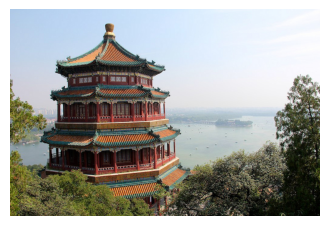

In [162]:
plt.figure(figsize=(4,4))
plt.imshow(image[0])
plt.axis("off")
plt.show()

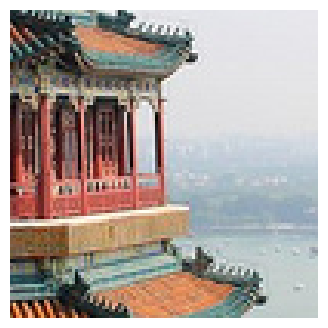

In [163]:
plt.figure(figsize=(4,4))
plt.imshow(cropped_image[0]/255)
plt.axis("off")
plt.show()

In [164]:
rescale_image_layer=tf.keras.layers.Rescaling(scale=2./255)
rescaled_image=rescale_image_layer(image)

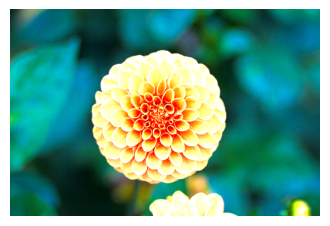

In [165]:
plt.figure(figsize=(4,4))
plt.imshow(rescaled_image[1])
plt.axis("off")
plt.show()

# Tensorflow Dataset

In [167]:
import tensorflow_datasets as tfds

train_set,valid_set,test_set=tfds.load(
    name="mnist",
    split=["train[:90%]","train[90%:]","test"],
    as_supervised=True
)
train_set=train_set.shuffle(10000,seed=42).batch(32).prefetch(1)
valid_set=valid_set.batch(32).cache()
test_set=test_set.batch(32).cache()

model=tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(30,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(30,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",
             metrics=["accuracy"])
history=model.fit(train_set,epochs=5,validation_data=(valid_set))
model.evaluate(test_set)

Epoch 1/5
  83/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.2713 - loss: 38.3103    

2025-07-26 18:22:09.808517: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 646us/step - accuracy: 0.6079 - loss: 6.6974 - val_accuracy: 0.7853 - val_loss: 0.7584
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step - accuracy: 0.8301 - loss: 0.6534 - val_accuracy: 0.8638 - val_loss: 0.5001
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 518us/step - accuracy: 0.8806 - loss: 0.4435 - val_accuracy: 0.8980 - val_loss: 0.3816
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - accuracy: 0.9051 - loss: 0.3483 - val_accuracy: 0.9185 - val_loss: 0.3011
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - accuracy: 0.9218 - loss: 0.2877 - val_accuracy: 0.9272 - val_loss: 0.2880
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.9296 - loss: 0.2652


[0.27349257469177246, 0.9309999942779541]